In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner 
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmpf7zgufyiGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_norm.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_norm.npy')
# images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
# masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

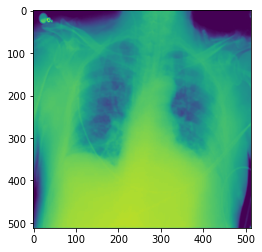

In [5]:
imshow(images[0])

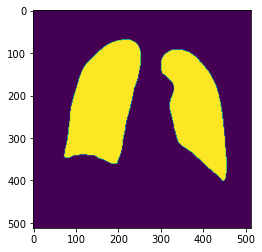

In [6]:
imshow(masks[0])

In [7]:
images.shape

(3616, 512, 512, 1)

In [8]:
masks.shape

(3616, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
3/3 [==============================] - 20s 5s/step - loss: 0.7770 - dice_coeff: 0.4070 - val_loss: 0.5688 - val_dice_coeff: 0.3070
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 0.7591 - dice_coeff: 0.4184 - val_loss: 0.5653 - val_dice_coeff: 0.3133
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.7578 - dice_coeff: 0.4187 - val_loss: 0.5620 - val_dice_coeff: 0.3205
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.7409 - dice_coeff: 0.4270 - val_loss: 0.5586 - val_dice_coeff: 0.3274
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.7299 - dice_coeff: 0.4312 - val_loss: 0.5558 - val_dice_coeff: 0.3344
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 0.7195 - dice_coeff: 0.4375 - val_loss: 0.5540 - val_dice_coeff: 0.3419
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 0.7189 - dice_coeff: 0.4383 - val_loss: 0.5543 - va

In [11]:
R.classifier_scores

[[0.5277981758117676, 0.47852247953414917],
 [0.40495389699935913, 0.6017410755157471],
 [0.32689473032951355, 0.6730430126190186],
 [0.3423992991447449, 0.7007558941841125],
 [0.27421891689300537, 0.7111027836799622],
 [0.17392665147781372, 0.80462247133255],
 [0.15350529551506042, 0.8212226033210754]]

In [12]:
R.discriminator_scores

[[5.518948076321806e-10, 1.0],
 [5.518948076321806e-10, 1.0],
 [5.518948076321806e-10, 1.0],
 [0.0, 1.0],
 [2.428331136172801e-08, 1.0],
 [1.297049948334461e-05, 1.0],
 [1.1996469766017981e-05, 1.0]]

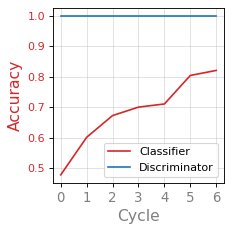

In [13]:
R.plot() 